In [2]:
# Enter your name(s) here
# Ashley Yude, acy366
# Danica Padlan, dmp3357

# Assignment 4 : Using `scikit-learn`

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. In this assigment you'll explore how to train various classifiers using the `scikit-learn` library. The scikit-learn documentation can be found [here](http://scikit-learn.org/stable/documentation.html).

In this assignment we'll attempt to classify patients as either having or not having diabetic retinopathy, using the same Diabetic Retinopathy data set from your previous assignments. Recall that this dataset contains 1151 records and 20 attributes (some categorical, some continuous). You can find additional details about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set).

In [3]:
#You may add additional imports
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time

In [4]:
%matplotlib inline

In [5]:
# Read the data from csv file
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

data = pd.read_csv("messidor_features.txt", names = col_names)
print(data.shape)
data.head(10)

(1150, 20)


,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1
7,1,1,6,6,6,6,2,1,20.679649,9.497786,1.223660,0.150382,0.000000,0.000000,0.000000,0.000000,0.576318,0.071071,1,0
8,1,1,22,21,18,15,13,10,66.691933,23.545543,6.151117,0.496372,0.000000,0.000000,0.000000,0.000000,0.500073,0.116793,0,1
9,1,1,79,75,73,71,64,47,22.141784,10.054384,0.874633,0.099780,0.023386,0.000000,0.000000,0.000000,0.560959,0.109134,0,1


### A. Data prep

Q1. All of the classifiers in `scikit-learn` require that you separate the feature columns from the class label column, so go ahead and do that first. You should end up with two separate data frames: one that contains all of the feature values and one that contains the class labels. 

Note: Later in this assignment, you may get a warning stating "a column-vector was passed when a 1d array was expected." This indicates that some function wants a _flat array_ of labels, rather than a 2D DataFrame of labels. You can go ahead and transform the labels into a flat array here by doing either `labels.values.ravel()` or `labels.iloc[:,0]`. And you can just use that flat array for everything.

Print the `shape` of your features data frame, the shape or len of your labels dataframe or array, and the `head` of the features data frame.

In [6]:
#separates features and labels
features_df = data.drop(['label'], axis=1)
labels_df = data['label']

print("Features Shape")
print(features_df.shape)
print("\n")

print("Labels Shape")
print(labels_df.shape)
print("\n")

print("Features Head")
print(features_df.head)
print("\n")

Features Shape
(1150, 19)


Labels Shape
(1150,)


Features Head
<bound method NDFrame.head of       quality  prescreen  ma2  ma3  ma4  ma5  ma6  ma7    exudate8   exudate9  \
0           1          1   22   22   22   19   18   14   49.895756  17.775994   
1           1          1   24   24   22   18   16   13   57.709936  23.799994   
2           1          1   62   60   59   54   47   33   55.831441  27.993933   
3           1          1   55   53   53   50   43   31   40.467228  18.445954   
4           1          1   44   44   44   41   39   27   18.026254   8.570709   
...       ...        ...  ...  ...  ...  ...  ...  ...         ...        ...   
1145        1          1   16   16   15   14   12    8  158.177307  84.865487   
1146        1          1   34   34   34   33   31   24    6.071765   0.937472   
1147        1          1   49   49   49   49   45   37   63.197145  27.377668   
1148        1          0   49   48   48   45   43   33   30.461898  13.966980   
1149        1 

### B. Decision Trees (DT) & Cross Validation

**Train/Test Split**

Q2. You can train a classifier using the holdout method by splitting your data into a  training set and a  test set, then you can evaluate the classifier on the held-out test set. 

Let's try this with a decision tree classifier. 

* Use `sklearn.model_selection.train_test_split` to split your dataset into training and test sets (do an 80%-20% split). Display how many records are in the training set and how many are in the test set.
* Use `sklearn.tree.DecisionTreeClassifier` to fit a decision tree classifier on the training set. Use entropy as the split criterion. 
* Now that the tree has been learned from the training data, we can run the test data through and predict classes for the test data. Use the `predict` method of `DecisionTreeClassifier` to classify the test data. 
* Then use `sklearn.metrics.accuracy_score` to print out the accuracy of the classifier on the test set.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#split data
x_train, x_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.20)

print("Training Set Size:")
print("x_train shape")
print(x_train.shape)
print("x_test shape")
print(x_test.shape)
print("\n")

print("Testing Set Size:")
print("y_train shape")
print(y_train.shape)
print("y_test shape")
print(y_test.shape)
print("\n")

#decision tree
dec_tree = DecisionTreeClassifier(criterion='entropy')

#train data on decision tree
dec_tree = dec_tree.fit(x_train, y_train)

#predict test set
y_pred = dec_tree.predict(x_test)

#print out accuracy
print('Accuracy on test data is:', (accuracy_score(y_test, y_pred) * 100))


Training Set Size:
x_train shape
(920, 19)
x_test shape
(230, 19)


Testing Set Size:
y_train shape
(920,)
y_test shape
(230,)


Accuracy on test data is: 65.21739130434783


Q3. Note that the DecisionTree classifier has many parameters that can be set. Try tweaking parameters like split criterion, max_depth, min_impurity_decrease, min_samples_leaf, min_samples_split, etc. to see how they affect accuracy. Print the accuracy of a few different variations.

In [8]:
#decision tree using gini
dec_tree = DecisionTreeClassifier(criterion='gini')
dec_tree = dec_tree.fit(x_train, y_train)
y_pred = dec_tree.predict(x_test)
print('Accuracy on test data using the split criterion gini is:', (accuracy_score(y_test, y_pred) * 100))


#decision tree using gini and max_depth=3
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
dec_tree = dec_tree.fit(x_train, y_train)
y_pred = dec_tree.predict(x_test)
print('Accuracy on test data using the split criterion gini & max_depth=3 is:', (accuracy_score(y_test, y_pred) * 100))


#decision tree using gini and max_depth=3
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=15)
dec_tree = dec_tree.fit(x_train, y_train)
y_pred = dec_tree.predict(x_test)
print('Accuracy on test data using the split criterion entropy & max_depth=15 is:', (accuracy_score(y_test, y_pred) * 100))

Accuracy on test data using the split criterion gini is: 62.60869565217392
Accuracy on test data using the split criterion gini & max_depth=3 is: 65.21739130434783
Accuracy on test data using the split criterion entropy & max_depth=15 is: 67.3913043478261


**Cross Validation**

Q4. You have now built a decision tree and tested it's accuracy using the "holdout" method. But as discussed in class, this is not sufficient for estimating generalization accuracy. Instead, we should use Cross Validation to get a better estimate of accuracy. 

Use `sklearn.model_selection.cross_val_score` to perform 10-fold cross validation on a decision tree. You will pass the FULL dataset into `cross_val_score` which will automatically divide it into the number of folds you tell it to, train a decision tree model on the training set for each fold, and test it on the test set for each fold. It will return a numpy array with the accuracy out of each fold. Average these accuracies to print out the generalization accuracy of the model.

In [9]:
# your code goes here
from sklearn.model_selection import cross_val_score


#decision tree w/ entropy
dec_tree = DecisionTreeClassifier(criterion='entropy')

# Run a 10-fold cross validation
scores = cross_val_score(dec_tree, features_df, labels_df, cv=10)                                            
print("Accuracy:", scores.mean()*100)

Accuracy: 62.43478260869566


**Nested Cross Validation**

Q5. Now we want to tune our model to use the best parameters to avoid overfitting to our training data. Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters (hyperparameters) specified in a grid. 
* Use `sklearn.model_selection.GridSearchCV` to find the best `max_depth`, `max_features`, and `min_samples_leaf` for your tree. Use a 5-fold-CV and 'accuracy' for the scoring criteria.
* Try the values [5,10,15,20] for `max_depth` and `min_samples_leaf`. Try [5,10,15] for `max_features`. 
* Print out the best value for each of the tested parameters (`best_params_`).
* Print out the accuracy of the model with these best values (`best_score_`).

In [14]:
from sklearn.model_selection import GridSearchCV

#new decision tree
dec_tree = DecisionTreeClassifier(criterion='entropy')

#create params
params = {"max_depth":  [5,10,15,20], 
         "min_samples_leaf":  [5,10,15,20],
         "max_features": [5,10,15]}

#perform parameter tuning with 5-fold CV
grid_search = GridSearchCV(dec_tree, params, cv=5, scoring='accuracy')

grid_search.fit(features_df, labels_df)

print("Best parameters")
print(grid_search.best_params_)

print("Accuracy:", grid_search.best_score_*100)

Best parameters
{'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 20}
Accuracy: 65.13043478260869


 Q6. What you did in Q5 performed the _inner_ loop of a nested CV (no test set was held out). What you did in Q4 performed an _outer_ loop of CV (holds out a test set). Now we need to combine them to perform the nested cross-validation that we discussed in class. To do this, you'll need to pass the a `GridSearchCV` into a `cross_val_score`. 

What this does is: the `cross_val_score` splits the data in to train and test sets for the first outer fold, and it passes the train set into `GridSearchCV`. `GridSearchCV` then splits that set into train and validation sets for k number of folds (the inner CV loop). The hyper-parameters for which the average score over all inner iterations is best, is reported as the `best_params_`, `best_score_`, and `best_estimator_`(best decision tree). This best decision tree is then evaluated with the test set from the `cross_val_score` (the outer CV loop). And this whole thing is repeated for the remaining k folds of the `cross_val_score` (the outer CV loop). 

That is a lot of explanation for a very complex (but IMPORTANT) process, which can all be performed with a single line of code!

Be patient for this one to run. The nested cross-validation loop can take some time. A [ * ] next to the cell indicates that it is still running.

Print the accuracy of your tuned, cross-validated model. This is the official accuracy that you would report for your model.

In [15]:
nested_score = cross_val_score(grid_search, features_df, labels_df)

print("Accuracy:", nested_score.mean()*100)

Accuracy: 62.43478260869566


### C. Naive Bayes (NB) & Evaluation Metrics

`sklearn.naive_bayes.GaussianNB` implements the Gaussian Naive Bayes algorithm for classification. This means that the liklihood of continuous features is estimated using a Gaussian distribution. (Refer to slide 13 of the Naive Bayes powerpoint notes.)

Q7. Create a `sklearn.naive_bayes.GaussianNB` classifier. Use `sklearn.model_selection.cross_val_score` to do a 10-fold cross validation on the classifier. Display the accuracy.

In [16]:
from sklearn.naive_bayes import GaussianNB

nb_cf = GaussianNB()

nb_cf.fit(features_df, labels_df)

nested_score = cross_val_score(nb_cf, features_df, labels_df, cv=10)

print("Accuracy:", nested_score.mean()*100)

Accuracy: 59.478260869565226


Q8. `cross_val_score` returns the scores of every test fold. There is another function called `cross_val_predict` that returns predicted y values for every record in the test fold. In other words, for each element in the input, `cross_val_predict` returns the prediction that was obtained for that element when it was in the test set. 

* Use `cross_val_predict` and `sklearn.metrics.confusion_matrix` to print the confusion matrix for the classifier.

* Sckit-learn also provides a useful function `sklearn.metrics.classification_report` for evaluating the classifier on a per-class basis. It is a summary of the precision, recall, and F1 score for each class (and support is just the actual class count). Display the classification report for your Naive Bayes classifier.

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

#assume cv = 10
pred_y = cross_val_predict(nb_cf, features_df, labels_df, cv = 10)

c_mat = confusion_matrix(labels_df, pred_y)

print("Confusion Matrix:")
print(c_mat)
print("\n")

report = classification_report(labels_df, pred_y)

print("Classification Report:")
print(report)
print("\n")


Confusion Matrix:
[[500  39]
 [427 184]]


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.93      0.68       539
           1       0.83      0.30      0.44       611

    accuracy                           0.59      1150
   macro avg       0.68      0.61      0.56      1150
weighted avg       0.69      0.59      0.55      1150





Q9. Using `sklearn.metrics.roc_curve` plot a ROC curve for the Naive Bayes classifier. Also calculate the area under the curve (AUC) using `sklearn.metrics.roc_auc_score`.

* We will just do this on a single holdout test set (because it gets more complicated to put this inside of a cross-validation). So, split your data into training and test sets using `sklearn.model_selection.train_test_split`. Do an 80/20 split.
* Fit the Naive Bayes classifier to the training data by calling the `fit` method on the trainng data.
* Now call the `predict_proba` method on your classifier and pass in the test data. This will return a 2D numpy array with one row for each datapoint in the test set and 2 columns. Column index 0 is the probability that this datapoint is in class 0, and column index 1 is the probability that this datapoint is in class 1.
* We are going to say that class 1 (having the disease) is the rare/positive class. To create a ROC curve, pass the actual Y labels and the probabilites of class 1 (column index 1 out of your predict_proba result) into `sklearn.metrics.roc_curve`
* Pass the FPR and TPR that `roc_curve` returns into the plotting code that we have provided you.
* Print the AUC (area under the curve) by using `sklearn.metrics.roc_auc_score`

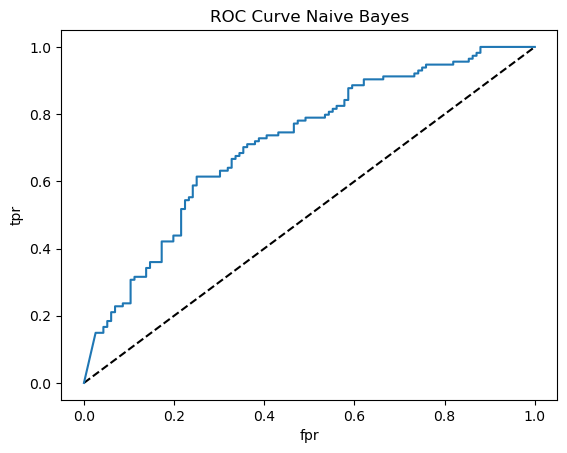

ROC AUC Score
0.7141938898971566


In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#split data
x_train, x_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.20)

#train data
nb_cf.fit(x_train, y_train)

pred_prob = nb_cf.predict_proba(x_test)
roc = roc_curve(y_test, pred_prob[:, 1])

#replace these fpr and tpr with the results of your roc_curve
fpr, tpr = roc[0], roc[1]

# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

#roc auc score
print("ROC AUC Score")
roc_auc = roc_auc_score(y_test, pred_prob[:, 1])
print (roc_auc)

### D. k-Nearest Neighbor (KNN) & Pipelines 

For some classification algorithms, scaling of the data is critical (like KNN, SVM, Neural Nets). For other classification algorithms, data scaling is not necessary (like Naive Bayes and Decision Trees). _Take a minute to think about why this is the case!!_ But using scaled data with an algorithm that doesn't explicitly need it to be scaled does not hurt the results of that algorithm.

Q10. The distance calculation method is central to the KNN algorithm. By default, `KNeighborsClassifier` uses  Euclidean distance as its metric (but this can be changed). Because of the distance calculations, it is critical to scale the data before running Nearest Neighbor!

We discussed why dimensionality reduction may also be needed with KNN because of the curse of dimensionality. So we may want to also perform a dimensionality reduction with PCA before running KNN. PCA should only be performed on scaled data! (Remember that you can also reduce dimensionality by performing feature selection and feature engineering.) 

An important note about scaling data and dimensionality reduction is that they should only be performed on the **training** data, then you transform the test data into the scaled, PCA space that was found on the training data. (Refer to the concept of [data leakage](https://machinelearningmastery.com/data-leakage-machine-learning/).)

So when you are doing cross-validation, the scaling and PCA needs to happen *inside of your CV loop*. This way, it is performed on the training set for the first fold, then the test set is put into that space. On the second fold, it is performed on the trainng set for the second fold, and the test set is put into that space. And so on for the remaining folds. 

In order to do this with scikit-learn, you must create what's called a `Pipeline` and pass that in to the cross validation. This is a very important concept for Data Mining and Machine Learning, so let's practice it here.

Do the following:
* Create a `sklearn.preprocessing.StandardScaler` object to standardize the dataset’s features (mean = 0 and variance = 1). (Do not call `fit` on it yet. Just create the `StandardScaler` object.)
* Create a `sklearn.decomposition.PCA` object to perform PCA dimensionality reduction. (Do not call `fit` on it yet. Just create the `PCA` object.)
* Create a `sklearn.neighbors.KNeighborsClassifier`. The number of neighbors defaults to 5 (k=5). Go ahead and change it to 7. (Do not call `fit` on it yet. Just create the `KNeighborsClassifier` object.)
* Create a `sklearn.pipeline.Pipeline` object and set the `steps` to the scaler, the PCA, and the KNN objects that you just created. 
* Pass the `pipeline` object in to a `cross_val_score` as the estimator, along with the features and the labels, and use a 5-fold-CV. 

In each fold of the cross validation, the training phase will use _only_ the training data for scaling, PCA, and training the model. Then the testing phase will scale & transform the test data into the PCA space (found on the training data) and run the test data through the trained classifier, to return an accuracy measurement for each fold. Print the average accuracy across all 5 folds. 

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#Note: warnings occur for KNeighborsClassifier(), but gets the cross score regardless of warning

scalar = StandardScaler()
PCA_obj = PCA()

k_neigh = KNeighborsClassifier()

pipe = Pipeline(steps=[('scalar', scalar), ('PCA', PCA_obj), ('K_Neighbors', k_neigh)])

cross_scores = cross_val_score(pipe, features_df, labels_df, cv=5)
print("Average Cross Scores: ", np.average(cross_scores) * 100)



Average Cross Scores:  60.8695652173913


Q11. Another important part of KNN is choosing the best number of neighbors (tuning the hyperparameter, k). We can use nested cross validation to do this. Let's try k values from 1-25 to find the best one. 

We _also_ want to find the best number of dimensions to project down onto using PCA. We can use nested cross validation to do this as well. Let's try from 5-19 dimensions.

* Starter code is provided to create the "parameter grid" to search. You will need to change this code! Where I have "knn__n_neighbors", this indicates that I want to tune the "n_neighbors" parameter in the "knn" part of the pipeline. When you created your pipeline above, you named the KNN part of the pipeline with a string. You should replace "knn" in the param_grid below with whatever you named your KNN part of the pipeline: **<replace_this>__n_neighbors.** Do the same for the PCA part of the pipeline.
* Create a `sklearn.model_selection.GridSearchCV` and pass in the pipeline, the param_grid, and set it to a 5-fold-CV.
* Now, on that `GridSearchCV` object, call `fit` and pass in the features and labels.
* Show the best number of dimensions and best number of neighbors for this dataset by printing the `best_params_` from the `GridSearchCV`.
* Also print the accuracy when using this best number of dimensions and neighbors by printing the `best_score_` from the `GridSearchCV`.

Be patient, this can take some time to run. It is trying every combination of dimensions from 5-19 with every k from 1-25! A [ * ] next to the cell indicates that it is still running.

In [20]:
'''
On the "pca" part of the pipeline, 
tune the n_components parameter,
by trying the values 5-19.

On the "knn" part of the pipeline, 
tune the n_neighbors parameter,
by trying the values 1-25.
'''
param_grid = {
    'PCA__n_components': list(range(5, 20)),
    'K_Neighbors__n_neighbors': list(range(1, 26))
}
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(features_df, labels_df)

print("Best parameters: ", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_*100)


Best parameters:  {'K_Neighbors__n_neighbors': 23, 'PCA__n_components': 14}
Accuracy: 66.17391304347827


Q12. In Q11, we did not hold out a test set. The accuracy reported out is on the _validation_ set. So now we need to wrap the whole process in another cross-validation to perform a nested cross-validation and report the accuarcy of this KNN model on unseen test data. This is the official accuracy you would report on this model.

You'll need to pass the `GridSearchCV` into a `cross_val_score`, just as you did with the decision tree. Use a 5-fold-CV for the outer loop. 

Again, be patient for this one to run. The nested cross-validation loop can take some time. It is doing what it did above in Q11 five times. A [ * ] next to the cell indicates that it is still running. (Just for comparison, mine takes about 2 mins to run and the fan revs up so it sounds like my computer is going to explode. All computers are different, so yours could take shorter or longer...)

<img src="model_is_training.png" width="250">

In [21]:
grid_search_cross_val = cross_val_score(grid_search, features_df, labels_df, cv=5)
print("Accuracy:", grid_search_cross_val.mean() *100)

Accuracy: 64.17391304347827


### E. Support Vector Machines (SVM)

Q13. Now put it all together with an SVM. 
* Create a `pipeline` that includes scaling, PCA, and an `sklearn.svm.SVC`.
* Create a parameter grid that tries number of dimensions from 5-19 and SVM kernels `linear`, `rbf` and `poly`.
* Create a `GridSearchCV` for the inner CV loop. Use a 5-fold CV.
* Run a `cross_val_predict` with a 10-fold CV for the outer loop. 
* Print out the accuracy and the classification report of using an SVM classifier on this data.

In [22]:
from sklearn.svm import SVC
param_grid = {
    'PCA__n_components': list(range(5, 20)),
    'SVC__kernel': ['linear', 'rbf', 'poly']
}

svc = SVC()
pipe = Pipeline(steps=[('scalar', scalar), ('PCA', PCA_obj), ('SVC', svc)])

grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)

cross_score = cross_val_score(grid, features_df, labels_df, cv=10)
pred_y = cross_val_predict(grid, features_df, labels_df, cv=10)

print("Accuracy: ", cross_score.mean() * 100)

report = classification_report(labels_df, pred_y)
print("Classifcation Report: ")
print(report)


Accuracy:  71.91304347826087
Classifcation Report: 
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       539
           1       0.81      0.62      0.70       611

    accuracy                           0.72      1150
   macro avg       0.73      0.73      0.72      1150
weighted avg       0.74      0.72      0.72      1150



### F. Neural Networks (NN)

Q14. Train a multi-layer perceptron with a single hidden layer using `sklearn.neural_network.MLPClassifier`. 
* Create a pipeline with scaling and a neural net. (No PCA on this one. But scaling is critical to neural nets.)
* Use `GridSearchCV` with 5 fold cross validation to find the best hidden layer size and the best activation function. 
* Try values of `hidden_layer_sizes` ranging from `(30,)` to `(60,)` by increments of 10.
* Try activation functions `logistic`, `tanh`, `relu`.
* Wrap your `GridSearchCV` in a 5-fold `cross_val_score` and report the accuracy of your neural net.

Be patient, as this can take a few minutes to run. You may get ConvergenceWarnings as it runs - that is fine.

In [23]:
from sklearn.neural_network import MLPClassifier

neural_net = MLPClassifier()
pipe = Pipeline(steps=[('scalar', scalar), ('Neural_Net', neural_net)])

param = {
    'Neural_Net__hidden_layer_sizes': [(30,), (40,), (50,), (60,)],
    'Neural_Net__activation': ['logistic', 'tanh', 'relu']
}

grid_search = GridSearchCV(estimator=pipe, param_grid=param, cv=5)


cv_score = cross_val_score(grid_search, features_df, labels_df, cv=5, error_score="raise")

print("Accuracy: ", cv_score.mean() * 100)

Accuracy:  74.08695652173914


### G. Ensemble Classifiers

Ensemble classifiers combine the predictions of multiple base estimators to improve the accuracy of the predictions. One of the key assumptions that ensemble classifiers make is that the base estimators are built independently (so they are diverse).

**Random Forests**

Q15. Use `sklearn.ensemble.RandomForestClassifier` to classify the data. Scaling the data is not necessary for Decision Trees (take a minute to think about why). So, no need for a pipeline here.

The default for RandomForest is to use 100 fully-grown decision trees. Let's use a `GridSearchCV` with a 5-fold CV to try various numbers of base classifiers and select the one with the best results. 

Try `n_estimators` of 50, 100, and 150 - this is the number of base classifiers in the ensemble. Wrap your GridSearchCV in a cross_val_score with 5-fold CV. Display the classification report. 

Note that this does get a higher accuracy than a single decision tree!

In [23]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators':  [50, 100, 150]}

random_trees = RandomForestClassifier()

grid_search = GridSearchCV(random_trees, params, cv=5)
cv_score = cross_val_score(grid_search, features_df, labels_df, cv=5)

print("Accuracy: ", cv_score.mean() * 100)

pred_y = cross_val_predict(grid_search, features_df, labels_df, cv=5)
report = classification_report(labels_df, pred_y)

print("Classification Report:")
print(report)
print("\n")




Accuracy:  68.26086956521739
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       539
           1       0.72      0.66      0.69       611

    accuracy                           0.68      1150
   macro avg       0.68      0.68      0.68      1150
weighted avg       0.69      0.68      0.68      1150





**AdaBoost**

Random Forests builds its base estimators independently, using bagging. There is another method of training ensemble classifiers called boosting. Here the classifiers are trained sequentially and each time the sampling of the training set depends on the performance of previously generated models.

Q16. Evaluate a `sklearn.ensemble.AdaBoostClassifier` classifier on the data. By default, `AdaBoostClassifier` uses 50 decision stumps as the base classifiers. Let's again use a `GridSearchCV` with a 5-fold CV to try various numbers of base classifiers.

Try `n_estimators` of 50, 100, and 150 - this is the number of base classifiers in the ensemble. Wrap your GridSearchCV in a cross_val_score with 5-fold CV. Display the classification report.

Note that even when using decision stumps as the base classifier, this gets a higher accuracy than a single decision tree!

In [24]:
from sklearn.ensemble import AdaBoostClassifier

params = {'n_estimators': [50, 100, 150]}

adaboost = AdaBoostClassifier()

grid_search = GridSearchCV(adaboost, params, cv=5)
cv_score = cross_val_score(grid_search, features_df, labels_df, cv=5)

pred_y = cross_val_predict(grid_search, features_df, labels_df, cv=5)
report = classification_report(labels_df, pred_y)

print("Classification Report: ", report)

Classification Report:                precision    recall  f1-score   support

           0       0.66      0.71      0.68       539
           1       0.72      0.67      0.70       611

    accuracy                           0.69      1150
   macro avg       0.69      0.69      0.69      1150
weighted avg       0.69      0.69      0.69      1150



### H. Build your final model

Now you have tested all kinds of classifiers on this data. Some have performed better than others. 

Q17. We may not want to deploy any of these models in the real world to actually diagnose patients because the accuracies are not high enough. What can we do to improve the accuracy rates? Answer as a comment:

In [ ]:
'''
We can do feature engineering and hypertune the parameters of different models. 
We could also utilize ensemble models since they are more reliable and have higher
accuracy due to running the dataset through multiple models and taking the class label
with the highest votes among all models.
'''

Q18. Let's say we *did* get to the point where we had a model with high enough accuracy and we want to deploy that model and use it for real-world predictions.

* Let's say we're going to deploy our SVM classifier.
* We need to make one final version of this model, where we use ALL of our available data for training (we do not hold out a test set this time, so no outer cross-validation loop). 
* We need to tune the parameters of the model on the FULL dataset, so copy the code you entered for Q13, but remove the outer cross validation loop (remove `cross_val_score`). Just run the `GridSearchCV` by calling `fit` on it and passing in the full dataset. This results in the final trained model with the best parameters for the full dataset. You can print out `best_params_` to see what they are.
* The accuracy of this model is what you assessed and reported in Q13.


* Use the `pickle` package to save your model. We have provided the lines of code for you, just make sure your final model gets passed in to `pickle.dump()`. This will save your model to a file called finalized_model.sav in your current working directory. 

In [25]:
import pickle

param_grid = {
    'PCA__n_components': list(range(5, 20)),
    'SVC__kernel': ['linear', 'rbf', 'poly']
}

svc = SVC()
pipe = Pipeline(steps=[('scalar', scalar), ('PCA', PCA_obj), ('SVC', svc)])

grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
grid.fit(features_df, labels_df)

print("Best Params: ", grid.best_params_)

#replace this final_model with your final model
final_model = grid

filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

Best Params:  {'PCA__n_components': 19, 'SVC__kernel': 'linear'}


Q19. Now if someone wants to use your trained, saved classifier to classify a new record, they can load the saved model and just call `predict` on it. 
* Given this new record, classify it with your saved model and print out either "Negative for disease" or "Positive for disease."
* Note that `predict` is expecting a list of lists (a list of records)

In [26]:
# some time later...

# use this as the new record to classify
record = [ 0.05905386, 0.2982129, 0.68613149, 0.75078865, 0.87119216, 0.88615694,
  0.93600623, 0.98369184, -0.47426472, -0.57642756, -0.53115361, -0.42789774,
 -0.21907738, -0.20090532, -0.21496782, -0.2080998, 0.06692373, -2.81681183,
 -0.7117194 ]

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

#turn flat list into list of list
new_record = []
new_record.append(record)

# your code goes here
pred_results = loaded_model.predict(new_record)

if pred_results == 1:
    print("Positive for disease")
else:
    print("Negative for disease")


Positive for disease
